---
# <div align="center"><font color='black'> COSC 2673/2793 | Machine Learning  </font></div>
## <div align="center"> <font color='green'> S3778713: **Assignment 1**</font></div>
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

healthData = pd.read_csv('./datasets/train_data.csv', delimiter=',')
healthData.head()

,ID,HealthServiceArea,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,1,New York City,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
1,2,New York City,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
2,3,New York City,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1
3,4,New York City,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1
4,5,New York City,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1


In [2]:
#remove ID and HealthServiceArea
healthData = healthData.drop(columns='ID')
healthData = healthData.drop(columns='HealthServiceArea')

healthData.head()

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
1,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
2,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1
3,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1
4,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1


In [3]:
healthData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59966 entries, 0 to 59965
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Gender                        59966 non-null  object
 1   Race                          59966 non-null  object
 2   TypeOfAdmission               59966 non-null  object
 3   CCSProcedureCode              59966 non-null  int64 
 4   APRSeverityOfIllnessCode      59966 non-null  int64 
 5   PaymentTypology               59966 non-null  object
 6   BirthWeight                   59966 non-null  int64 
 7   EmergencyDepartmentIndicator  59966 non-null  object
 8   AverageCostInCounty           59966 non-null  int64 
 9   AverageChargesInCounty        59966 non-null  int64 
 10  AverageCostInFacility         59966 non-null  int64 
 11  AverageChargesInFacility      59966 non-null  int64 
 12  AverageIncomeInZipCode        59966 non-null  int64 
 13  LengthOfStay    

As we can see from the given attributes above we have categorical columns. For a decision tree to be used for our classification model, we must convert these to categorical datatype using pandas.

In [4]:
for col in healthData.columns:
    if healthData[col].dtype == object:
        healthData[col] = healthData[col].astype('category')

We then transform our target variable LengthOfStay to classes 0 and 1 respectively to identify a patient's length of stay as class 0 with 3 days or less of hospital stay and class 1 otherwise.

To use sklearn’s classification decision tree learner, we must also convert this from a numerical to a categorical attribute. 

In [5]:
healthData['LengthOfStay'] = pd.cut(healthData.LengthOfStay, bins=[0,4,11], labels=[0, 1], right=False)
healthData['LengthOfStay'] = healthData['LengthOfStay'].apply(str)
healthData['LengthOfStay'] = healthData['LengthOfStay'].astype('category')

In [6]:
healthData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59966 entries, 0 to 59965
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Gender                        59966 non-null  category
 1   Race                          59966 non-null  category
 2   TypeOfAdmission               59966 non-null  category
 3   CCSProcedureCode              59966 non-null  int64   
 4   APRSeverityOfIllnessCode      59966 non-null  int64   
 5   PaymentTypology               59966 non-null  category
 6   BirthWeight                   59966 non-null  int64   
 7   EmergencyDepartmentIndicator  59966 non-null  category
 8   AverageCostInCounty           59966 non-null  int64   
 9   AverageChargesInCounty        59966 non-null  int64   
 10  AverageCostInFacility         59966 non-null  int64   
 11  AverageChargesInFacility      59966 non-null  int64   
 12  AverageIncomeInZipCode        59966 non-null  

Categorical attributes must then be converted to a new column with values 1 or 0 to represent each categorical value to be able to create our decision tree. This process is called one hot encoding.

In order to do this, we must separate our target variable from the rest of the attributes.

In [7]:
target = healthData['LengthOfStay']
attributes = healthData.drop(columns='LengthOfStay')

We then one hot encode our attributes.

In [8]:
attributesNum = pd.get_dummies(attributes)
attributesNum.head()

,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,Gender_F,Gender_M,...,PaymentTypology_Federal/State/Local/VA,"PaymentTypology_Managed Care, Unspecified",PaymentTypology_Medicaid,PaymentTypology_Medicare,PaymentTypology_Miscellaneous/Other,PaymentTypology_Private Health Insurance,PaymentTypology_Self-Pay,PaymentTypology_Unknown,EmergencyDepartmentIndicator_N,EmergencyDepartmentIndicator_Y
0,228,1,3700,2611,9227,1751,8951,45,1,0,...,0,0,1,0,0,0,0,0,1,0
1,228,1,2900,3242,8966,3338,6409,34,0,1,...,0,0,1,0,0,0,0,0,1,0
2,220,1,3200,3155,11381,4980,9323,45,0,1,...,0,0,0,0,0,1,0,0,1,0
3,0,1,3300,3155,11381,5826,15680,59,1,0,...,0,0,0,0,0,1,0,0,1,0
4,228,1,2600,2611,9227,6000,14344,59,1,0,...,0,0,1,0,0,0,0,0,1,0


As we can see from above, by using the get_dummies() function, we have increased the number of our attributes which will be used for the decision tree learning.

We then check whether our target variable has integer values. Although the target will be treated by sklearn as a category, sklearn requires that these categories are represented as integers (not strings). As our target values are already integers, we do not need to pre-process these anymore.

In [9]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(target)
target_labels = le.inverse_transform([0,1])
print(target_labels)

['0' '1']


# Exploratory Data Analysis (EDA)

We first check whether there are any missing values.

In [10]:
pd.isna(healthData).sum()

Gender                          0
Race                            0
TypeOfAdmission                 0
CCSProcedureCode                0
APRSeverityOfIllnessCode        0
PaymentTypology                 0
BirthWeight                     0
EmergencyDepartmentIndicator    0
AverageCostInCounty             0
AverageChargesInCounty          0
AverageCostInFacility           0
AverageChargesInFacility        0
AverageIncomeInZipCode          0
LengthOfStay                    0
dtype: int64

Although done during pre-processing, it is good practice to know the attributes we will be working with and their corresponding datatypes.

In [11]:
healthData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59966 entries, 0 to 59965
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Gender                        59966 non-null  category
 1   Race                          59966 non-null  category
 2   TypeOfAdmission               59966 non-null  category
 3   CCSProcedureCode              59966 non-null  int64   
 4   APRSeverityOfIllnessCode      59966 non-null  int64   
 5   PaymentTypology               59966 non-null  category
 6   BirthWeight                   59966 non-null  int64   
 7   EmergencyDepartmentIndicator  59966 non-null  category
 8   AverageCostInCounty           59966 non-null  int64   
 9   AverageChargesInCounty        59966 non-null  int64   
 10  AverageCostInFacility         59966 non-null  int64   
 11  AverageChargesInFacility      59966 non-null  int64   
 12  AverageIncomeInZipCode        59966 non-null  

We then check how our numerical variables are distributed and note down the analysis we have observed.

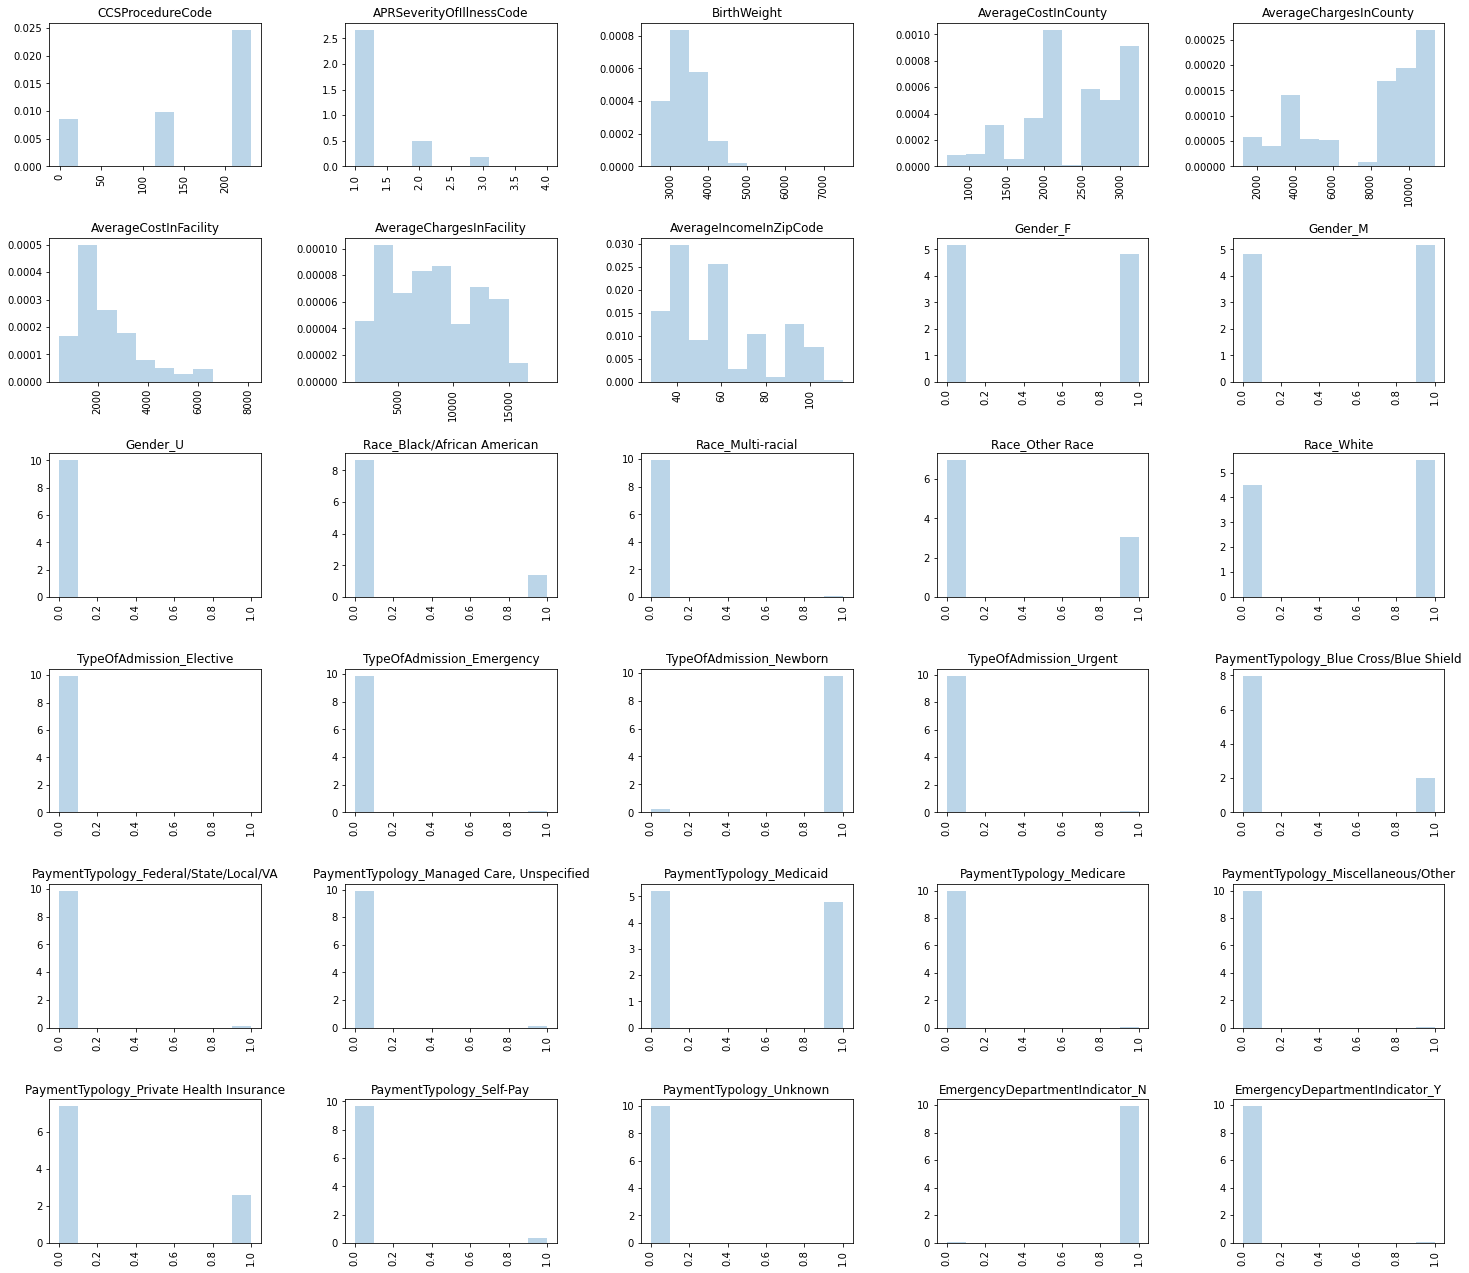

In [12]:
plt.figure(figsize=(25,60))

for i , col in enumerate(attributesNum.columns):
    plt.subplot(20,5,i+1)
    plt.hist(attributesNum[col], alpha = 0.3, density=True)
    plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.4)
    plt.title(col)
    plt.xticks(rotation='vertical')

From the data above, these significant observations have been made.

> - Genders of patients are almost equally distributed.
> - Most patients' cases fall under minor (1) of attribute`APRSeverityOfIllnessCode`. This can be related to all admission types in the data are newborn, which in most cases are not severe.
> - `BirthWeight` is distributed around 3,200.
> - `AverageCostInFacility` and `AverageIncomeInZipCode` are negatively skewed.



We then check our target attribute for any imbalances as this can affect the way we perform the evaluation metric later on.

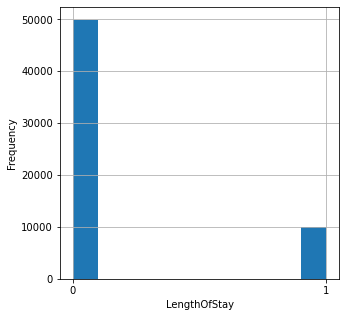

In [13]:
target.hist(figsize=(5,5))
plt.xlabel('LengthOfStay')
plt.ylabel('Frequency')
plt.show()

As we can see from the data above, our target variable is negatively imbalanced. 

# Splitting Dataset

In [14]:
from sklearn.model_selection import train_test_split 
  
with pd.option_context('mode.chained_assignment', None): 
    train_data_X_, test_data_X, train_data_y_ , test_data_y = train_test_split(attributesNum, target, test_size=0.2,  
                                              shuffle=True,random_state=0) 
     
with pd.option_context('mode.chained_assignment', None): 
    train_data_X, val_data_X, train_data_y, val_data_y = train_test_split(train_data_X_, train_data_y_, test_size=0.25,  
                                            shuffle=True,random_state=0) 
     
print(train_data_X.shape, val_data_X.shape, test_data_X.shape)  

(35979, 30) (11993, 30) (11994, 30)


In [15]:
train_X = train_data_X.to_numpy() 
train_y = train_data_y 
  
test_X = test_data_X.to_numpy() 
test_y = test_data_y 
  
val_X = val_data_X.to_numpy() 
val_y = val_data_y

In [16]:
import graphviz  
  
def get_tree_2_plot(clf): 
    dot_data = tree.export_graphviz(clf, out_file=None,  
                      feature_names=attributesNum.columns,   
                      class_names=target_labels,
                      special_characters=True,
                      filled=True, rounded=True)   
    graph = graphviz.Source(dot_data)  
    return graph 

In [17]:
from sklearn.metrics import f1_score 
  
def get_acc_scores(clf, train_X, train_y, val_X, val_y): 
    train_pred = clf.predict(train_X) 
    val_pred = clf.predict(val_X) 
     
    train_acc = f1_score(train_y, train_pred, average='macro') 
    val_acc = f1_score(val_y, val_pred, average='macro') 
     
    return train_acc, val_acc 

In [18]:
from sklearn import tree 
  
tree_max_depth = 6 #trial and error which depth is better in terms of information gain, justify
  
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=tree_max_depth, class_weight='balanced') 
clf = clf.fit(train_X, train_y) 

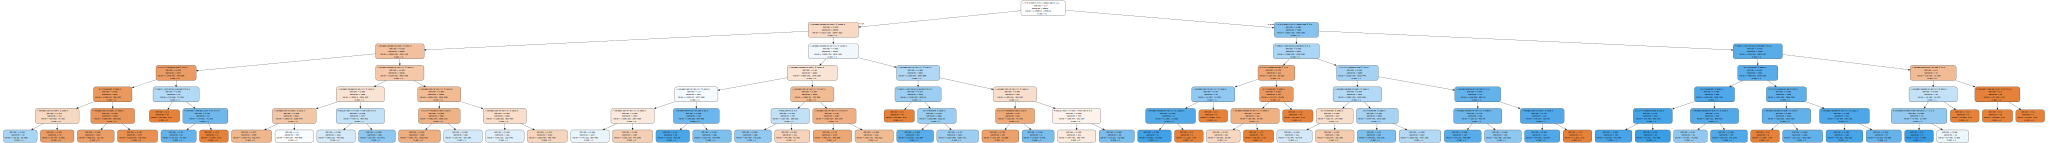

In [19]:
Dtree = get_tree_2_plot(clf) 
Dtree 

In [20]:
train_acc, val_acc = get_acc_scores(clf,train_X, train_y, val_X, val_y)
print("Train f1 score: {:.3f}".format(train_acc))
print("Validation f1 score: {:.3f}".format(val_acc))

Train f1 score: 0.601
Validation f1 score: 0.598


In [21]:
#HYPER PARAMTER TUNING
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':np.arange(2,400, 50), 'min_samples_split':np.arange(2,50,5)}

dt_clf = tree.DecisionTreeClassifier(criterion='entropy', class_weight='balanced')
Gridclf = GridSearchCV(dt_clf, parameters, scoring='f1_macro')
Gridclf.fit(train_X, train_y)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='entropy'),
             param_grid={'max_depth': array([  2,  52, 102, 152, 202, 252, 302, 352]),
                         'min_samples_split': array([ 2,  7, 12, 17, 22, 27, 32, 37, 42, 47])},
             scoring='f1_macro')

In [22]:
pd.DataFrame(Gridclf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.075496,0.002111,0.048330,0.000178,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.516860,0.530457,0.520108,0.527894,0.523326,0.523729,0.004961,71
1,0.073931,0.000656,0.048088,0.000303,2,7,"{'max_depth': 2, 'min_samples_split': 7}",0.516860,0.530457,0.520108,0.527894,0.523326,0.523729,0.004961,71
2,0.073699,0.000729,0.048149,0.000100,2,12,"{'max_depth': 2, 'min_samples_split': 12}",0.516860,0.530457,0.520108,0.527894,0.523326,0.523729,0.004961,71
3,0.073688,0.000218,0.048274,0.000123,2,17,"{'max_depth': 2, 'min_samples_split': 17}",0.516860,0.530457,0.520108,0.527894,0.523326,0.523729,0.004961,71
4,0.073971,0.000484,0.048204,0.000099,2,22,"{'max_depth': 2, 'min_samples_split': 22}",0.516860,0.530457,0.520108,0.527894,0.523326,0.523729,0.004961,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.186672,0.002665,0.049541,0.000359,352,27,"{'max_depth': 352, 'min_samples_split': 27}",0.579136,0.579433,0.578488,0.591566,0.570076,0.579740,0.006860,39
76,0.184571,0.002214,0.049400,0.000406,352,32,"{'max_depth': 352, 'min_samples_split': 32}",0.582536,0.584248,0.582025,0.590672,0.574617,0.582820,0.005132,26
77,0.181809,0.001857,0.049347,0.000272,352,37,"{'max_depth': 352, 'min_samples_split': 37}",0.581263,0.584770,0.580973,0.590957,0.579538,0.583500,0.004106,15
78,0.180983,0.002253,0.049401,0.000296,352,42,"{'max_depth': 352, 'min_samples_split': 42}",0.578647,0.588035,0.581839,0.595788,0.582515,0.585365,0.006024,7


In [23]:
print(Gridclf.best_score_)
print(Gridclf.best_params_)

clf = Gridclf.best_estimator_

0.5858993267539624
{'max_depth': 202, 'min_samples_split': 42}


In [24]:
train_acc, val_acc = get_acc_scores(clf,train_X, train_y, val_X, val_y)
print("Train f1 score: {:.3f}".format(train_acc))
print("Validation f1 score: {:.3f}".format(val_acc))

Train f1 score: 0.677
Validation f1 score: 0.590


In [25]:
#POST PRUNING
clf = tree.DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(train_X, train_y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [26]:
print(ccp_alphas)

[0.         0.         0.         ... 0.0027709  0.00471152 0.01759259]


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

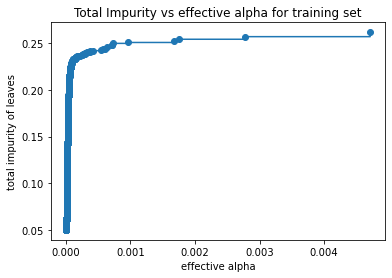

In [27]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")


In [28]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha, class_weight='balanced')
    clf.fit(train_X, train_y)
    clfs.append(clf)

In [ ]:
train_scores = [f1_score(train_y, clf.predict(train_X), average='macro') for clf in clfs]
val_scores = [f1_score(val_y, clf.predict(val_X), average='macro') for clf in clfs]

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("alpha")
ax.set_ylabel("f1_score")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=6, n_estimators=500, class_weight='balanced_subsample', random_state=0)
clf.fit(train_X, train_y)

In [ ]:
train_acc, val_acc = get_acc_scores(clf, train_X, train_y, val_X, val_y)
print("Train Accuracy score: {:.3f}".format(train_acc))
print("Validation Accuracy score: {:.3f}".format(val_acc))

In [ ]:
#POST PRUNING
max_depths = [2,4,5,8,10,11]

train_hold = list()
val_hold = list()

for max_depth in max_depths:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf = clf.fit(train_X, train_y)
    
    train_acc, val_acc = get_acc_scores(clf, train_X, train_y, val_X, val_y)
    
    train_hold.append(train_acc)
    val_hold.append(val_acc)

In [ ]:
#POST PRUNING
plt.plot(max_depths, train_hold, 'r--')
plt.plot(max_depths, val_hold, 'b-')
plt.legend(['Train Acc','Val Acc'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#analyze which depth is optimal for the data

# Final Model